In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
dataset = "kidney_disease.csv"

df = pd.read_csv(dataset)
df.tail()
print(df.shape)


(400, 26)


In [3]:
df.drop('id', axis = 1, inplace = True)

In [4]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [5]:
# converting necessary columns to numerical type 
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [6]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [7]:
# make a replace for incorect value 

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [8]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [9]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

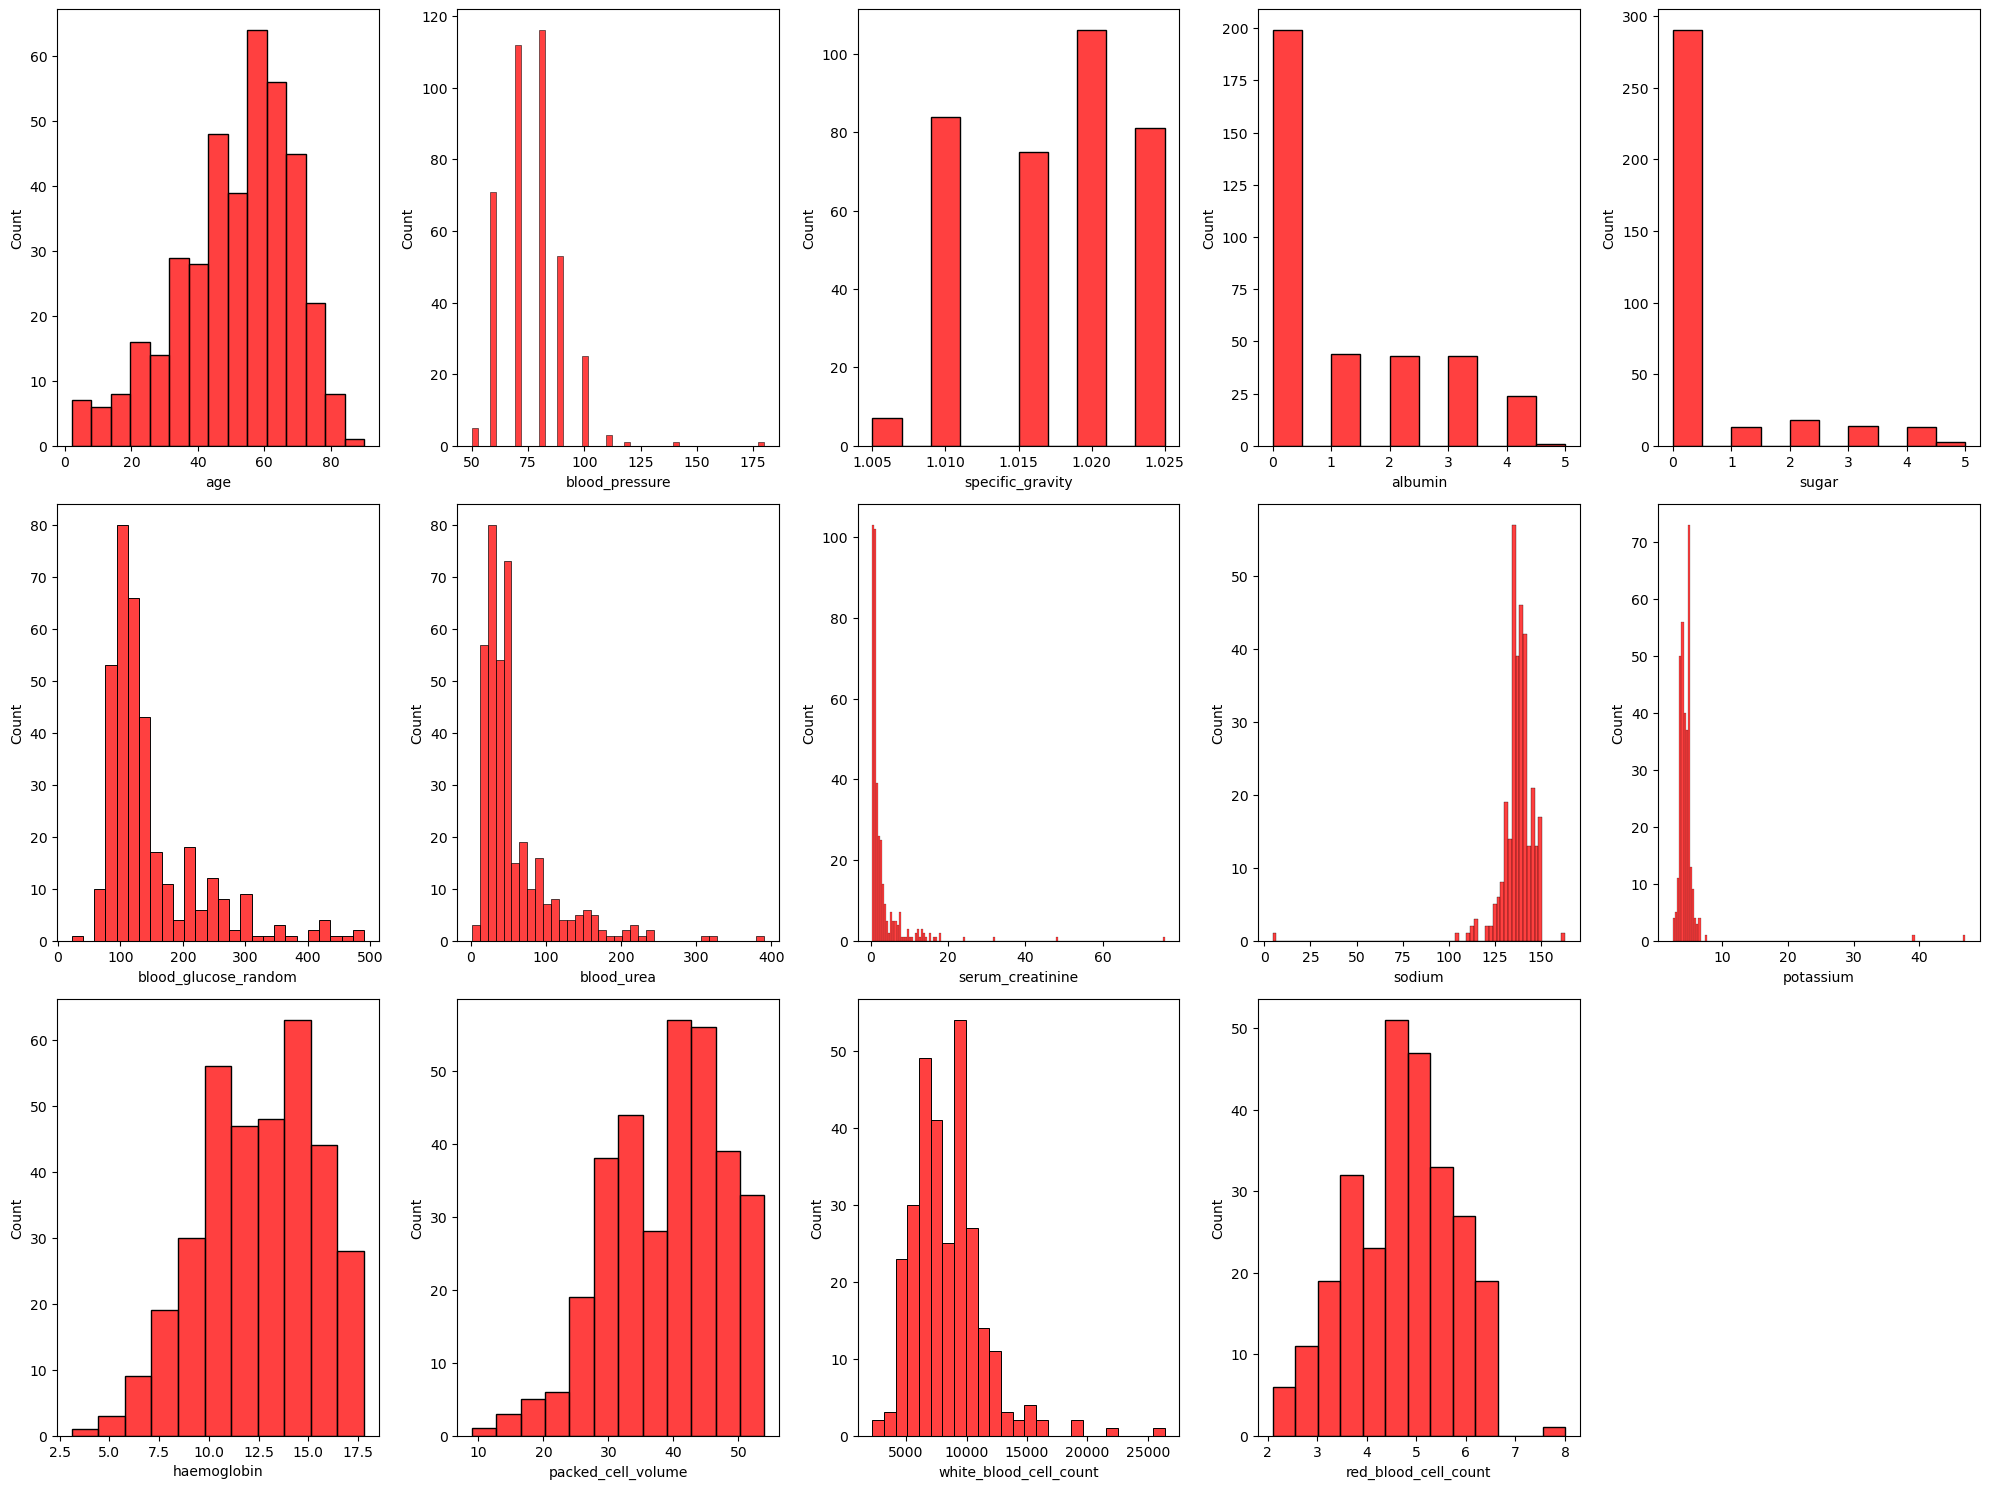

In [10]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df[column],color='red',)
        plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [11]:
print(df.isnull().sum())

def meanFill(df, cols):
    for col in cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

meanFill(df, num_cols)
df.isnull().sum()

df['red_blood_cells'].fillna(df['red_blood_cells'].mode()[0], inplace=True)
df['pus_cell'].fillna(df['pus_cell'].mode()[0], inplace=True)
df['pus_cell_clumps'].fillna(df['pus_cell_clumps'].mode()[0], inplace=True)
df['bacteria'].fillna(df['bacteria'].mode()[0], inplace=True)
df['appetite'].fillna(df['appetite'].mode()[0], inplace=True)
df['peda_edema'].fillna(df['peda_edema'].mode()[0], inplace=True)
df['aanemia'].fillna(df['aanemia'].mode()[0], inplace=True)
df['hypertension'].fillna(df['hypertension'].mode()[0], inplace=True)
df['diabetes_mellitus'].fillna(df['diabetes_mellitus'].mode()[0], inplace=True)
df['coronary_artery_disease'].fillna(df['coronary_artery_disease'].mode()[0], inplace=True)
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64


age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [12]:
train, test = train_test_split(df, test_size=0.4, random_state=28)
train, validation = train_test_split(df, test_size=0.1, random_state=28)

print(f"Train set has {train.shape[0]} rows and {train.shape[1]} columns")
print(f"Test set has {test.shape[0]} rows and {test.shape[1]} columns")
print(f"Validation set has {validation.shape[0]} rows and {validation.shape[1]} columns")
test.head()

Train set has 360 rows and 25 columns
Test set has 160 rows and 25 columns
Validation set has 40 rows and 25 columns


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
61,67.0,80.0,1.010,1.0,3.0,normal,abnormal,notpresent,notpresent,182.0,...,38.884498,8406.122449,4.707435,no,no,no,good,yes,no,0
229,59.0,50.0,1.010,3.0,0.0,normal,abnormal,notpresent,notpresent,241.0,...,31.000000,15700.000000,3.800000,no,yes,no,good,yes,no,0
247,54.0,90.0,1.025,1.0,0.0,normal,abnormal,notpresent,notpresent,150.0,...,38.884498,8406.122449,4.707435,no,no,no,poor,yes,yes,0
291,47.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,124.0,...,41.000000,7000.000000,5.700000,no,no,no,good,no,no,1
155,50.0,70.0,1.020,3.0,0.0,abnormal,normal,present,present,123.0,...,36.000000,4700.000000,4.707435,no,no,no,good,no,no,0


In [13]:
# convert categorical columns to numerical
le = LabelEncoder()

for col in cat_cols:
    train[col] = le.fit_transform(train[col])
    validation[col] = le.transform(validation[col])
    test[col] = le.transform(test[col])


# split data into features and target
X_train = train.drop('class', axis=1)
y_train = train['class']

X_test = test.drop('class', axis=1)
y_test = test['class']

X_validation = validation.drop('class', axis=1)
y_validation = validation['class']

# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_validation = scaler.transform(X_validation)




In [14]:
def run_model(model, X_train, y_train, X_test, y_test, X_validation, y_validation):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
    print()
    print(f"Classification report: {classification_report(y_test, y_pred)}")
    cm = confusion_matrix(y_test, y_pred)
    # print(cm)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, cmap='Greys')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()
    print()
    print(f"Validation score: {model.score(X_validation, y_validation)}")

Accuracy score: 1.0

Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00        65

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



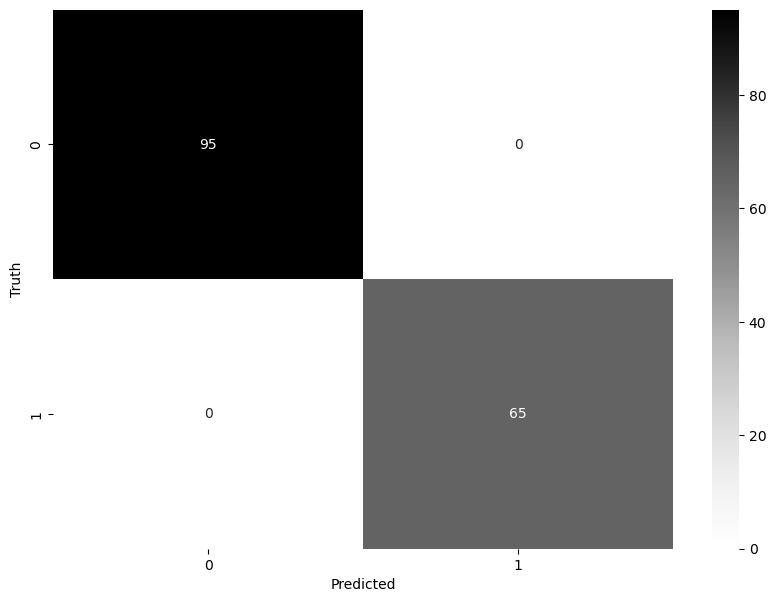


Validation score: 1.0


In [15]:
# run logistic regression
log_reg = LogisticRegression()
run_model(log_reg, X_train, y_train, X_test, y_test, X_validation, y_validation)

Accuracy score: 0.99375

Classification report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99        95
           1       1.00      0.98      0.99        65

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



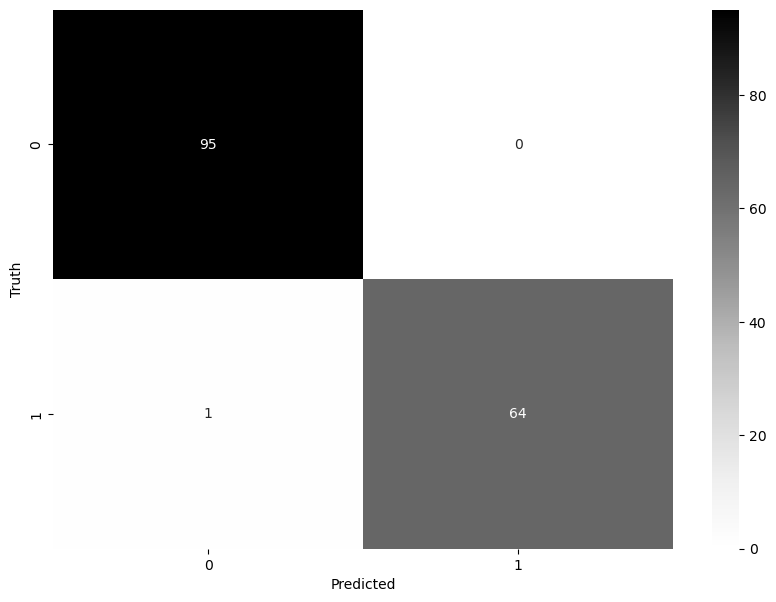


Validation score: 0.975


In [16]:
# run random forest
rf = RandomForestClassifier()
run_model(rf, X_train, y_train, X_test, y_test, X_validation, y_validation)


Accuracy score: 0.9875

Classification report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99        95
           1       0.98      0.98      0.98        65

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



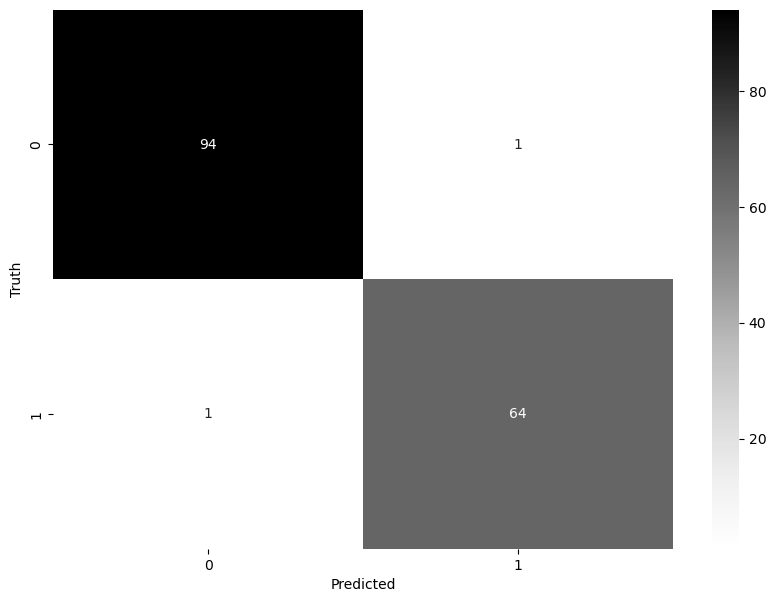


Validation score: 0.95


In [17]:
# run decision tree
dt = DecisionTreeClassifier()
run_model(dt, X_train, y_train, X_test, y_test, X_validation, y_validation)


Accuracy score: 1.0

Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00        65

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



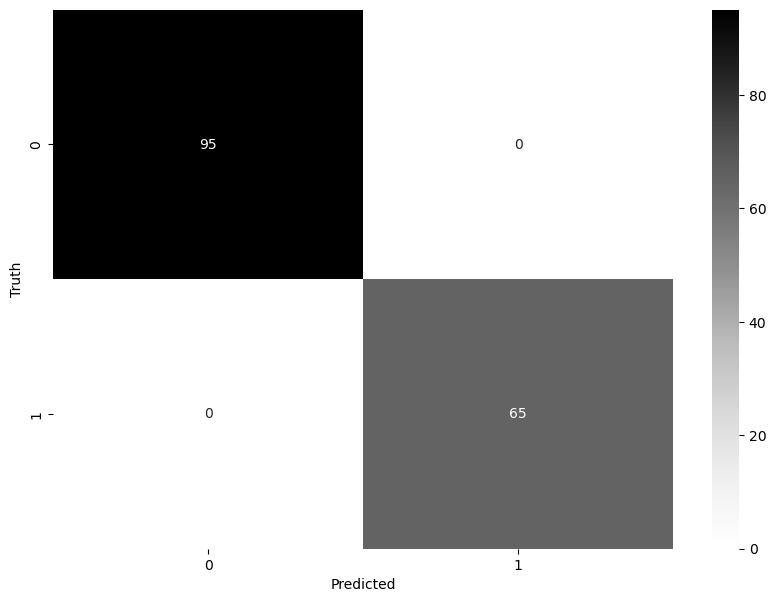


Validation score: 1.0


In [18]:
# run support vector machine
svm = SVC()
run_model(svm, X_train, y_train, X_test, y_test, X_validation, y_validation)


Accuracy score: 0.96875

Classification report:               precision    recall  f1-score   support

           0       1.00      0.95      0.97        95
           1       0.93      1.00      0.96        65

    accuracy                           0.97       160
   macro avg       0.96      0.97      0.97       160
weighted avg       0.97      0.97      0.97       160



C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


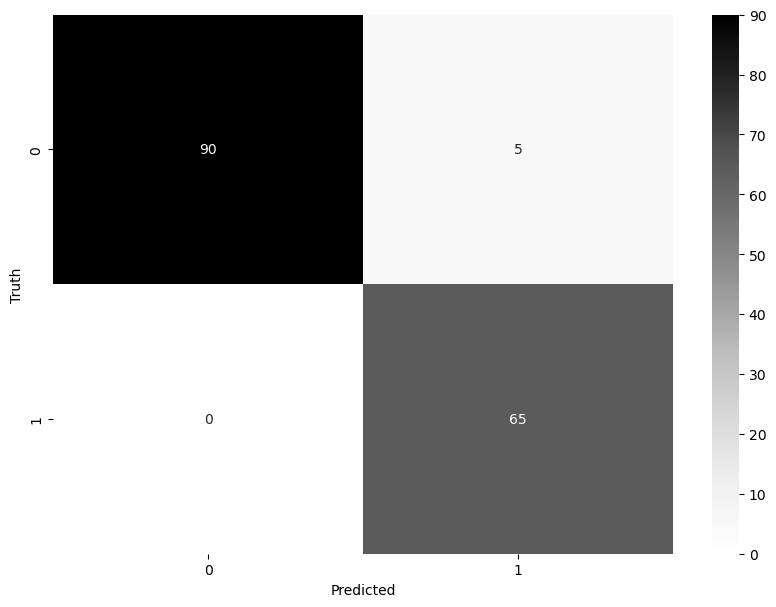


Validation score: 0.95


C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [19]:
# run k-nearest neighbors
knn = KNeighborsClassifier()
run_model(knn, X_train, y_train, X_test, y_test, X_validation, y_validation)


Accuracy score: 0.94375

Classification report:               precision    recall  f1-score   support

           0       1.00      0.91      0.95        95
           1       0.88      1.00      0.94        65

    accuracy                           0.94       160
   macro avg       0.94      0.95      0.94       160
weighted avg       0.95      0.94      0.94       160



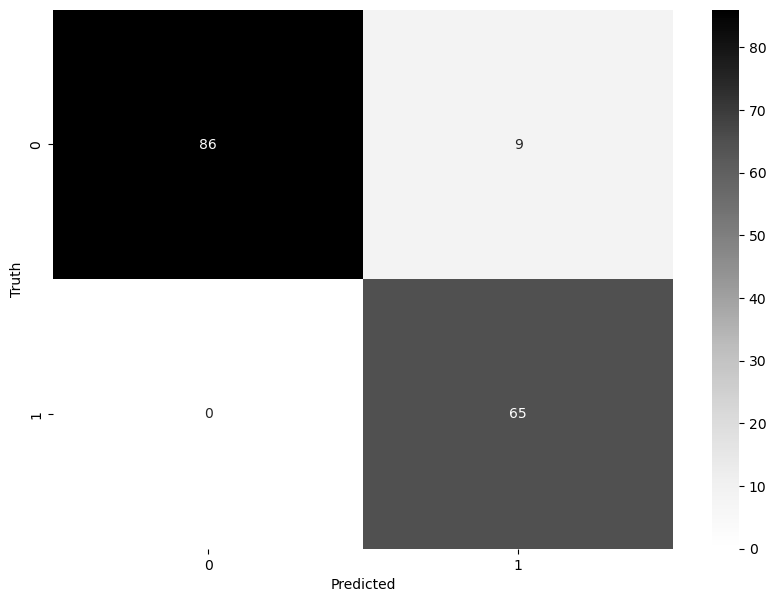


Validation score: 0.9


In [20]:
# naive bayes
nb = GaussianNB()
run_model(nb, X_train, y_train, X_test, y_test, X_validation, y_validation)

In [21]:
# use nn for kidney disease prediction

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
import numpy as np

model = Sequential()
model.add(Dense(32, input_dim=24, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30, batch_size=10, validation_data=(X_validation, y_validation))

# evaluate the model
scores = model.evaluate(X_test, y_test)
print(f"{model.metrics_names[1]}: {scores[1]*100}")

# save model
model.save('kidney_disease.h5')


Epoch 1/30
36/36 [==============================] - 2s 15ms/step - loss: 0.4721 - accuracy: 0.8528 - val_loss: 0.3993 - val_accuracy: 0.8750
Epoch 2/30
36/36 [==============================] - 0s 5ms/step - loss: 0.2754 - accuracy: 0.9556 - val_loss: 0.2238 - val_accuracy: 0.9500
Epoch 3/30
36/36 [==============================] - 0s 5ms/step - loss: 0.1392 - accuracy: 0.9861 - val_loss: 0.1087 - val_accuracy: 1.0000
Epoch 4/30
36/36 [==============================] - 0s 5ms/step - loss: 0.0685 - accuracy: 0.9944 - val_loss: 0.0614 - val_accuracy: 1.0000
Epoch 5/30
36/36 [==============================] - 0s 5ms/step - loss: 0.0416 - accuracy: 0.9944 - val_loss: 0.0442 - val_accuracy: 1.0000
Epoch 6/30
36/36 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.9944 - val_loss: 0.0341 - val_accuracy: 1.0000
Epoch 7/30
36/36 [==============================] - 0s 5ms/step - loss: 0.0214 - accuracy: 1.0000 - val_loss: 0.0309 - val_accuracy: 1.0000
Epoch 8/30
36/36 [=

(160, 24)
5/5 [==============================] - 0s 3ms/step


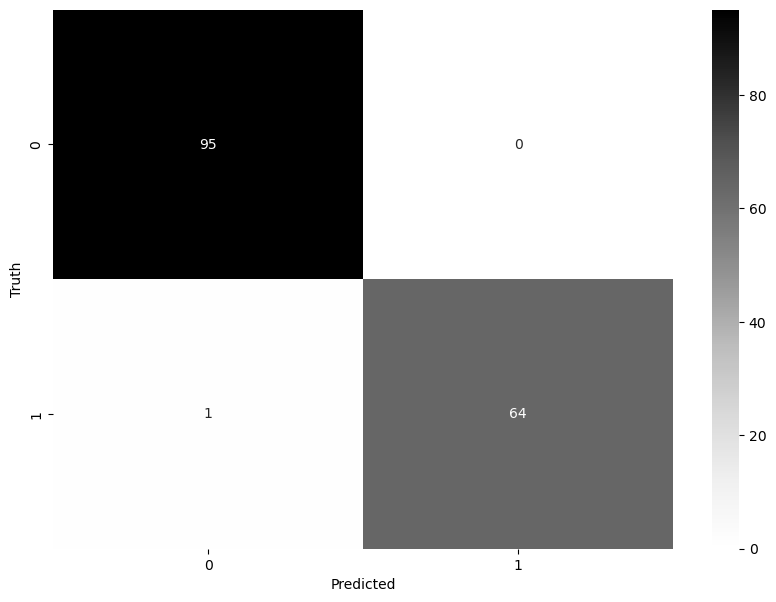

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        95
           1       1.00      0.98      0.99        65

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160

Accuracy score: 0.99375


In [22]:
# load model
model = keras.models.load_model('kidney_disease.h5')

# make predictions
print(X_test.shape)
predictions = model.predict(X_test)
rounded = [round(x[0]) for x in predictions]
# print(rounded)


# confusion matrix
cm = confusion_matrix(y_test, rounded)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Greys')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# classification report
print(classification_report(y_test, rounded))

# accuracy score
print(f'Accuracy score: {accuracy_score(y_test, rounded)}')
